<a href="https://colab.research.google.com/github/Sedighe-Raeisi/Random_Forest/blob/main/vidhya_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!unzip /content/dtaNVyKCQw2ZA7NIMusW_Decision_Tree-1565248361226.zip -d /content/drive/MyDrive/MachineLearing/vidhya/random_forest

Archive:  /content/dtaNVyKCQw2ZA7NIMusW_Decision_Tree-1565248361226.zip
   creating: /content/drive/MyDrive/MachineLearing/vidhya/random_forest/Decision_Tree/
  inflating: /content/drive/MyDrive/MachineLearing/vidhya/random_forest/Decision_Tree/Decision Tree.ipynb  
  inflating: /content/drive/MyDrive/MachineLearing/vidhya/random_forest/Decision_Tree/data_cleaned.csv  


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearing/vidhya/random_forest/Decision_Tree/data_cleaned.csv')

In [ ]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.shape

(891, 25)

In [ ]:
df.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
y=df.Survived
x=df.drop(['Survived'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,random_state=101,stratify=y,test_size=.25)

In [ ]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [ ]:
y_valid.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model=DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
dt_model.score(x_train,y_train)

0.9880239520958084

In [ ]:
dt_model.score(x_valid,y_valid)

0.7533632286995515

In [ ]:
# dt_model.predict_proba(x_valid)

In [ ]:
y_pred=dt_model.predict_proba(x_valid)[:,1]

In [ ]:
y_new=[]
for i in range(len(y_pred)):
  if y_pred[i]<.6:
    y_new.append(0)
  else:
    y_new.append(1)
    

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid,y_new)

0.7533632286995515

In [ ]:
train_acc=[]
valid_acc=[]
for i in range(1,10):
  dt_model=DecisionTreeClassifier(random_state=10,max_depth=i)
  dt_model.fit(x_train,y_train)
  train_acc.append(dt_model.score(x_train,y_train))
  valid_acc.append(dt_model.score(x_valid,y_valid))

In [ ]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_acc,'valid_acc':valid_acc})

In [ ]:
frame

,max_depth,train_acc,valid_acc
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.784753
8,9,0.931138,0.775785


No handles with labels found to put in legend.


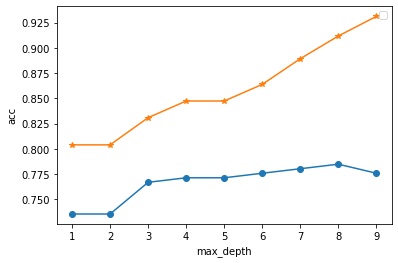

In [ ]:
plt.plot(frame.max_depth,frame.valid_acc,marker='o')
plt.plot(frame.max_depth,frame.train_acc,marker='*')
plt.xlabel('max_depth')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
train_acc=[]
valid_acc=[]
for i in range(2,50):
  dt_model=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=i)
  dt_model.fit(x_train,y_train)
  train_acc.append(dt_model.score(x_train,y_train))
  valid_acc.append(dt_model.score(x_valid,y_valid))

In [ ]:
f=pd.DataFrame({'max_leaf':range(2,50),'train_acc':train_acc,'valid_acc':valid_acc})

In [ ]:
f.head()

,max_leaf,train_acc,valid_acc
0,2,0.803892,0.735426
1,3,0.803892,0.735426
2,4,0.826347,0.762332
3,5,0.826347,0.762332
4,6,0.830838,0.766816


No handles with labels found to put in legend.


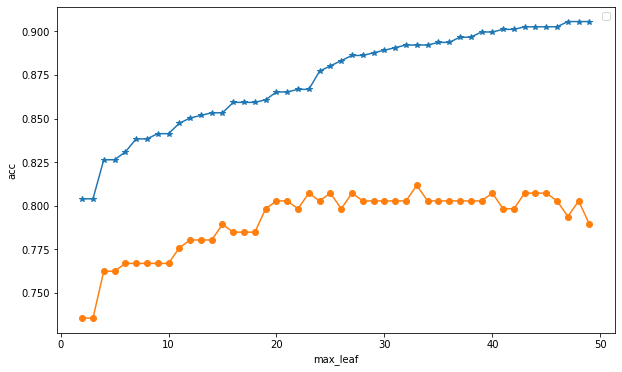

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(f.max_leaf,f.train_acc,marker='*')
plt.plot(f.max_leaf,f.valid_acc,marker='o')
plt.xlabel('max_leaf')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
f.tail()

,max_leaf,train_acc,valid_acc
43,45,0.902695,0.807175
44,46,0.902695,0.802691
45,47,0.905689,0.793722
46,48,0.905689,0.802691
47,49,0.905689,0.789238


In [ ]:
from sklearn import tree

In [ ]:
!pip install graphviz

In [ ]:
desision_tree=tree.export_graphviz(dt_model,out_file='tree.dot',max_depth=2,feature_names=x_train.columns)

In [ ]:
!dot -Tpng tree.dot -o tree.png

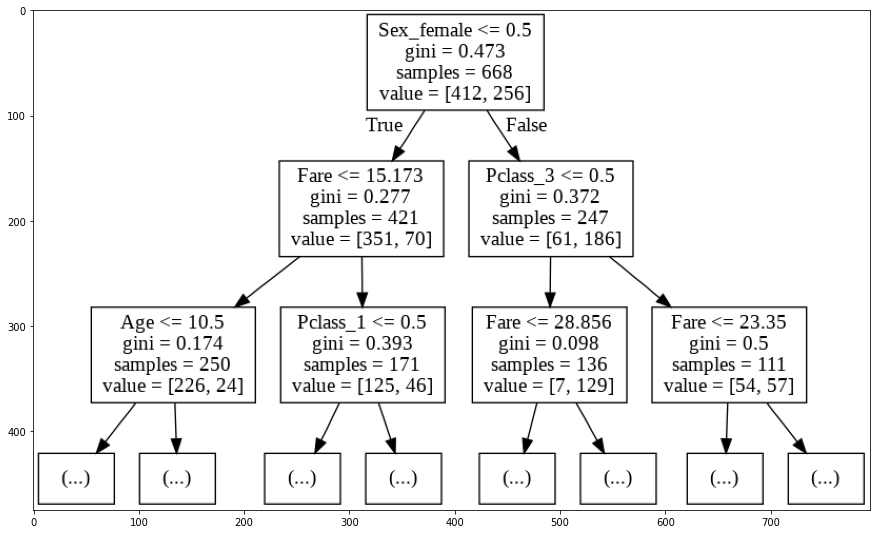

In [ ]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)